In [2]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

In [3]:
root_image = "images/"

## Number Disparties
The number of disparity parameter indicates how many pixels will
be matched from the right image for pixels in the range of [𝑥𝑟 +
𝑚𝑖𝑛_𝐷𝑖𝑠𝑝𝑎𝑟𝑖𝑡𝑦, 𝑥𝑟 + 𝑚𝑖𝑛_𝐷𝑖𝑠𝑝𝑎𝑟𝑖𝑡𝑦 + 𝑛𝑢𝑚𝑏𝑒𝑟_𝐷𝑖𝑠𝑝𝑎𝑟𝑖𝑡𝑦] where
min_Disparity is a value of the minimum disparity in the disparity
map, by default, this parameter is set to 16 to ensure a good quality. That is, the number of
disparity parameter is the range from minimum disparity to the
maximum disparity.
## Block Size
The Block size parameter indicates the size of the window size
for each block in the block matching algorithm, the size of the
block will affect the calculation performance while a lower value
means the smaller blocks will be matching in each iteration which
leads to a large number of calculations.In contrast, the larger size
of blocks the smoother of the disparity map generated.

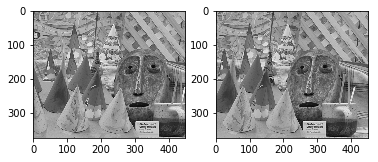

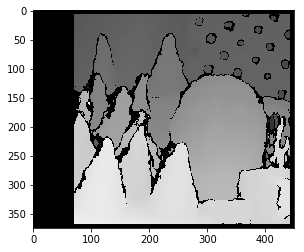

In [4]:
imgL = cv.imread(root_image+'left.png',0)
imgR = cv.imread(root_image+'right.png',0)
stereo = cv.StereoBM_create(numDisparities=64, blockSize=15)
disparity = stereo.compute(imgL,imgR)
plt.subplot(121)
plt.imshow(imgL,'gray')
plt.subplot(122)
plt.imshow(imgR,'gray')
plt.show()
plt.imshow(disparity,'gray')
plt.show()

# Create Color Palette
Generate multiple levels of color indicating every level of depth.

In [5]:
# hexColors = ['#ff603b', '#f97750', '#f18b65', '#e79e7a', '#dbaf8f', '#cbc0a5', '#b7d0bb', '#9de0d1', '#75f0e8', '#00ffff']
hexColors = ['#FD5151', '#FBDE60', '#A3DEAE', '#39B4C8', '#2B5FC1']
hexColors.reverse()

In [6]:
def hex2RGB(hexc):
    h = hexc.lstrip('#')
    return [int(h[i:i+2], 16) for i in (0, 2, 4)]

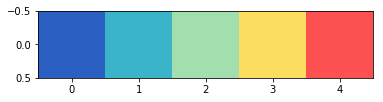

In [7]:
# Colors = [[88,95,244],[226,158,0],[255,102,0],[219,4,15],[0,0,0]]
Colors = [hex2RGB(i) for i in hexColors]
p = np.array(list(map(lambda x: [x], Colors)))
plt.imshow(p.reshape((p.shape[1],p.shape[0],3)))


# The Two Different Algorithms

### Block Matching
Block-matching algorithm is a motion estimation method that creates a grid of blocks by dividing the image into equally sized blocks
and compares the differences/errors for each block from the left
view corresponding to blocks in the right view. 

In [8]:
def genDepthBM(imgL,imgR,number_disparities=64, block_size=15):
    stereo = cv.StereoBM_create(numDisparities=number_disparities, blockSize=block_size)
    disparity = stereo.compute(imgL,imgR)
    mind = np.min(disparity)
    maxd = np.max(disparity)
    disparity = disparity+abs(mind)
    disparity = disparity / (maxd+abs(mind))
    return disparity

### Semi-Global Block Matching
Semi-Global Block Matching algorithm is to perform line optimisation along multiple directions and computing an aggregated cost by summing the costs to reach pixel with disparity from each direction.

In [9]:
def genDepthSGBM(imgL,imgR,number_disparities=64, block_size=15):
    stereo = cv.StereoSGBM_create(numDisparities=number_disparities, blockSize=block_size)
    disparity = stereo.compute(imgL,imgR)
    mind = np.min(disparity)
    maxd = np.max(disparity)
    disparity = disparity+abs(mind)
    disparity = disparity / (maxd+abs(mind))
    return disparity

# Generate Color Map
Classify different levels of depth from the depth map that generated from two algorithms, then calculate the approximate value in that interval,indicating by different colors.

In [10]:
def genColor(pixel,nmin,nmax,colorP):
    steps = len(colorP)
    pos = pixel/nmax
    return np.array(colorP[int(steps*pos)-1])/255
    

In [11]:
def genColorMap(depth,colorPlatte):
    colorMap = np.zeros((depth.shape[0],depth.shape[1],3))
    mind = np.min(depth)
    maxd = np.max(depth)
    for i in range(colorMap.shape[0]):
        for j in range(colorMap.shape[1]):
            colorMap[i,j] = genColor(depth[i,j],mind,maxd,colorPlatte)
    return colorMap

# Demo
All image are stored in the folder "images".

In [12]:
# left_img = root_image+'left.png'
# right_img = root_image+'left.png'

In [13]:
left_img = root_image+'swordL.png'
right_img = root_image+'swordR.png'

### Tweaking the value of block size and number of dispisparities here

In [14]:
blockSize = 15 
numberDisp = 32

In [15]:
imgL = cv.imread(left_img,0)
imgR = cv.imread(right_img,0)
depth_bm = genDepthBM(imgL,imgR,number_disparities=numberDisp, block_size=blockSize)
depth_sgbm = genDepthSGBM(imgL,imgR,number_disparities=numberDisp, block_size=blockSize)

color_depth_bm = genColorMap(depth_bm,Colors)
color_depth_sgbm = genColorMap(depth_sgbm,Colors)

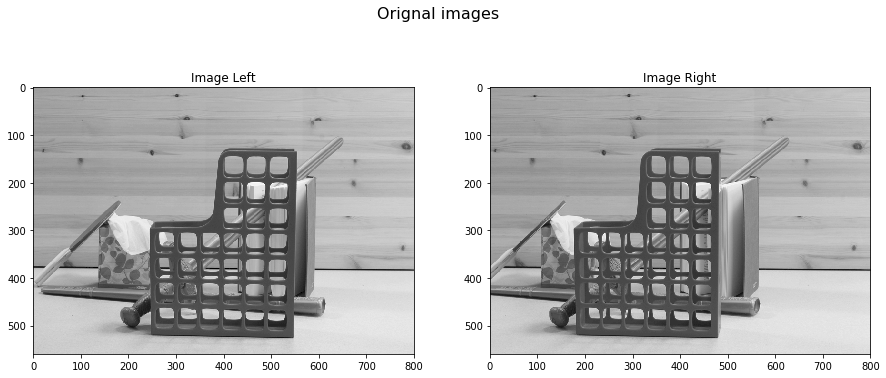

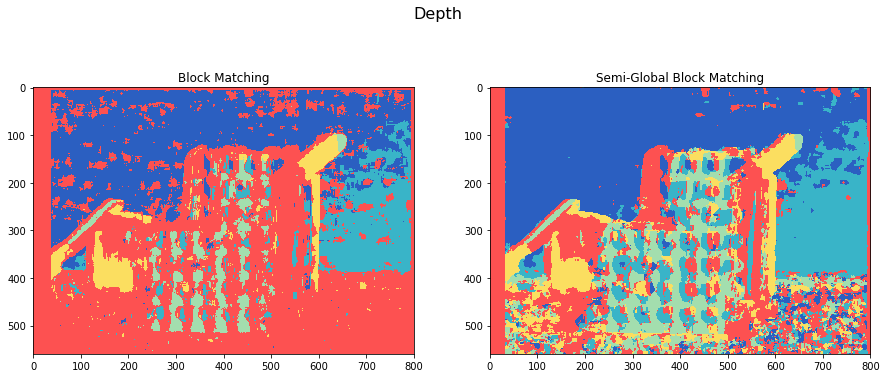

In [16]:
fig , axs = plt.subplots(1,2,figsize=(15,10))
axs[0].imshow(imgL,cmap="gray")
axs[0].set_title('Image Left')
axs[1].imshow(imgR,cmap="gray")
axs[1].set_title('Image Right')
fig.suptitle("Orignal images",fontsize=16, y=.8)
plt.show()
fig , axs = plt.subplots(1,2,figsize=(15,10))
axs[0].imshow(color_depth_bm)
axs[0].set_title('Block Matching')
axs[1].imshow(color_depth_sgbm)
axs[1].set_title('Semi-Global Block Matching')
fig.suptitle("Depth",fontsize=16,y=.8)
plt.show()